##Aviation project 

##Import Libraries
we will import all packages,those we need in our ptoject .

In [500]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Importing Data 
Pandas package help us to convert data from csv to DataFrame

In [501]:

df=pd.read_csv('aviation.csv',  engine='python')


##Reading data

In [502]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Unnamed: 31
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,NaN,1,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020,NaN
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,NaN,2,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020,NaN
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,NaN,1,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020,NaN
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,NaN,1,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019,NaN
4,20191228X23853,Accident,CEN20MA044,12/28/2019,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,NaN,5,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,6/1/2020,NaN


In [503]:
df=df.drop(['Unnamed: 31'],axis=1)

#Data Exploration 
we will explor our data to see what is in our data, How many columns and what kind of data we have .

###Columns values

In [504]:
df.columns.values

array(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.Flight', 'Air.Carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.Phase.of.Flight', 'Report.Status', 'Publication.Date'],
      dtype=object)

### Column Types
Let's look at the number of columns of each data type. ``int64``,  ``float64`` and ``object`` are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [505]:
df.dtypes.value_counts()


object     24
float64     6
int64       1
dtype: int64

Now we will see the unique values in object type columns .

In [506]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Event.Id                 83032
Investigation.Type           2
Accident.Number          84259
Event.Date               13717
Location                 26575
Country                    179
Airport.Code             10001
Airport.Name             23862
Injury.Severity            128
Aircraft.Damage              3
Aircraft.Category           13
Registration.Number      72554
Make                      8022
Model                    11935
Amateur.Built                2
Engine.Type                 13
FAR.Description             18
Schedule                     3
Purpose.of.Flight           22
Air.Carrier               3030
Weather.Condition            3
Broad.Phase.of.Flight       12
Report.Status                4
Publication.Date          3956
dtype: int64

####Shape of data

In [507]:
df.shape

(84260, 31)

we have total 84260 rows and 31 columns .

In [508]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,30162.000000,30153.000000,79225.000000,84260.000000,54384.000000,55592.000000,69673.000000
mean,37.544663,-93.507608,1.146936,0.896808,0.331715,0.518708,5.901325
std,12.370414,39.454863,0.447012,5.178598,1.375602,2.771339,29.534302
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.307778,-114.860833,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.124167,-94.371667,1.000000,1.000000,0.000000,0.000000,1.000000
75%,42.523750,-81.650000,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000


##Missing Values
Now we will see missing values in each column of our data set 

In [509]:
# checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Air.Carrier,80091,95.052219
Schedule,72417,85.944695
FAR.Description,57057,67.715405
Aircraft.Category,56752,67.353430
Longitude,54107,64.214337
Latitude,54098,64.203655
Airport.Code,36540,43.365773
Airport.Name,33822,40.140043
Total.Serious.Injuries,29876,35.456919
Total.Minor.Injuries,28668,34.023261


Our data has a lot of missing values .if use dropna function to drop those rows which have missing values,we will lost all data ,becasue each row has some missing values .

##Rename Columns Name 
It is important for us to give proper names to our columns 

In [510]:
df.columns=['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'FAR_Description', 'Schedule', 'Purpose_of_Flight', 'Air_Carrier',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_of_Flight', 'Report_Status', 'Publication_Date']

#Let's convert Date from object type to timestamp

In [511]:
df['Event_Date'] = pd.to_datetime(df['Event_Date'])
df['Year'] = df['Event_Date'].dt.year
#

Let's Clean the data ,by imputing 

In [512]:
def meanFFill_imputation(df):
    df.fillna(df.mean(), inplace=True)
    return df
df_meanffill= meanFFill_imputation(df)
df_meanffill.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_Carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status,Publication_Date,Year
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,NaN,1,0.331715,0.518708,1.000000,VMC,TAKEOFF,Factual,13/01/2020,2019.0
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,NaN,2,0.331715,0.518708,5.901325,VMC,TAKEOFF,Preliminary,8/1/2020,2019.0
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,NaN,1,0.331715,0.518708,2.000000,NaN,NaN,Preliminary,2/1/2020,2019.0
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,NaN,1,0.331715,0.518708,1.000000,NaN,NaN,Preliminary,31/12/2019,2019.0
4,20191228X23853,Accident,CEN20MA044,2019-12-28,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,NaN,5,2.000000,2.000000,5.901325,IMC,TAKEOFF,Preliminary,6/1/2020,2019.0


In [513]:
df.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_Damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_Flight                 object
Air_Carrier                       object
Total_Fatal_Injuries               int64
Total_Serious_In

In [514]:

df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Event_Id                 83032
Investigation_Type           2
Accident_Number          84259
Location                 26575
Country                    179
Airport_Code             10001
Airport_Name             23862
Injury_Severity            128
Aircraft_Damage              3
Aircraft_Category           13
Registration_Number      72554
Make                      8022
Model                    11935
Amateur_Built                2
Engine_Type                 13
FAR_Description             18
Schedule                     3
Purpose_of_Flight           22
Air_Carrier               3030
Weather_Condition            3
Broad_Phase_of_Flight       12
Report_Status                4
Publication_Date          3956
dtype: int64

In [515]:
df['Report_Status'].unique

<bound method Series.unique of 0               Factual
1           Preliminary
2           Preliminary
3           Preliminary
4           Preliminary
              ...      
84255    Probable Cause
84256    Probable Cause
84257    Probable Cause
84258    Probable Cause
84259       Preliminary
Name: Report_Status, Length: 84260, dtype: object>

In [516]:
df2=df.drop(['Event_Id', 'Accident_Number', 'Event_Date',
       'Location', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'FAR_Description', 'Schedule', 'Purpose_of_Flight', 'Air_Carrier',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_of_Flight', 'Publication_Date',
       'Year'],axis=1)

In [517]:
df2.head()

,Investigation_Type,Country,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Report_Status
0,Accident,United States,Non-Fatal,Substantial,1,0.331715,Factual
1,Accident,United States,Fatal(2),Destroyed,2,0.331715,Preliminary
2,Accident,United States,Non-Fatal,Substantial,1,0.331715,Preliminary
3,Accident,United States,Non-Fatal,Substantial,1,0.331715,Preliminary
4,Accident,United States,Fatal(5),Destroyed,5,2.000000,Preliminary


In [518]:
df2.dtypes

Investigation_Type         object
Country                    object
Injury_Severity            object
Aircraft_Damage            object
Total_Fatal_Injuries        int64
Total_Serious_Injuries    float64
Report_Status              object
dtype: object

#Hot Encoding is important to convert categories into Number 

In [519]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df2['Investigation_Type'] = labelencoder.fit_transform( df2['Investigation_Type'] )
df2['Aircraft_Damage'] = labelencoder.fit_transform( df2['Aircraft_Damage'] )
df2['Country'] = labelencoder.fit_transform( df2['Country'] )
df2['Injury_Severity'] = labelencoder.fit_transform( df2['Injury_Severity'] )
df2['Report_Status'] = labelencoder.fit_transform( df2['Report_Status'] )

In [520]:
df2.head()

,Investigation_Type,Country,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Report_Status
0,0,169,126,2,1,0.331715,0
1,0,169,50,0,2,0.331715,2
2,0,169,126,2,1,0.331715,2
3,0,169,126,2,1,0.331715,2
4,0,169,90,0,5,2.000000,2


#Model Building

Let's split the data into training and test .

In [521]:
x=df2.drop(['Investigation_Type'],axis=1)
y=df2.Investigation_Type.values

In [522]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [523]:
x_train.dtypes

Country                     int32
Injury_Severity             int32
Aircraft_Damage             int32
Total_Fatal_Injuries        int64
Total_Serious_Injuries    float64
Report_Status               int32
dtype: object

In [524]:

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [525]:
accuracies = {}
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 99.90%


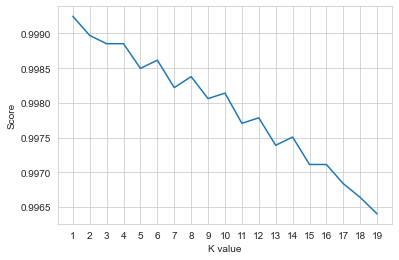

Maximum KNN Score is 99.92%


In [526]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

 As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="purple">KNN Model's Accuracy is <font color="red">99.92%</font></font>

# Decision Tree Algorithm

In [527]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(random_state=4, max_depth=2)
dtc.fit(x_train.T, y_train.T)



acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


## <font color="green">Test Accuracy of Decision Tree Algorithm: <font color="red">100.00%</font></font>

#Random Forest

In [528]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


## <font color="orange">Test Accuracy of Random Forest Algorithm: <font color="red">100.00%</font></font>

#Comparing Models

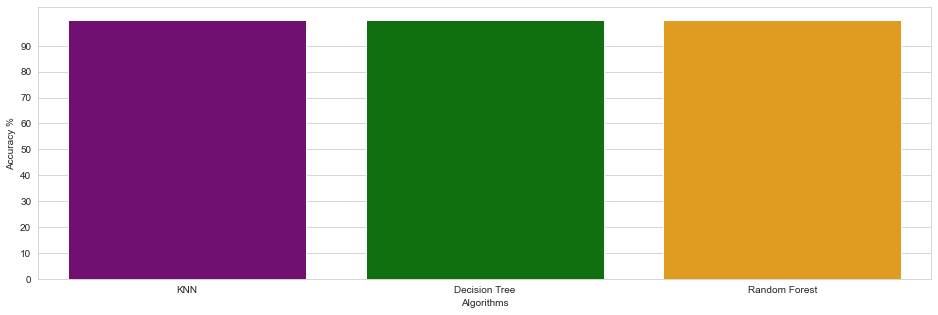

In [529]:

colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#Confusion Matrix for test

In [530]:
# Predicted values

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [531]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

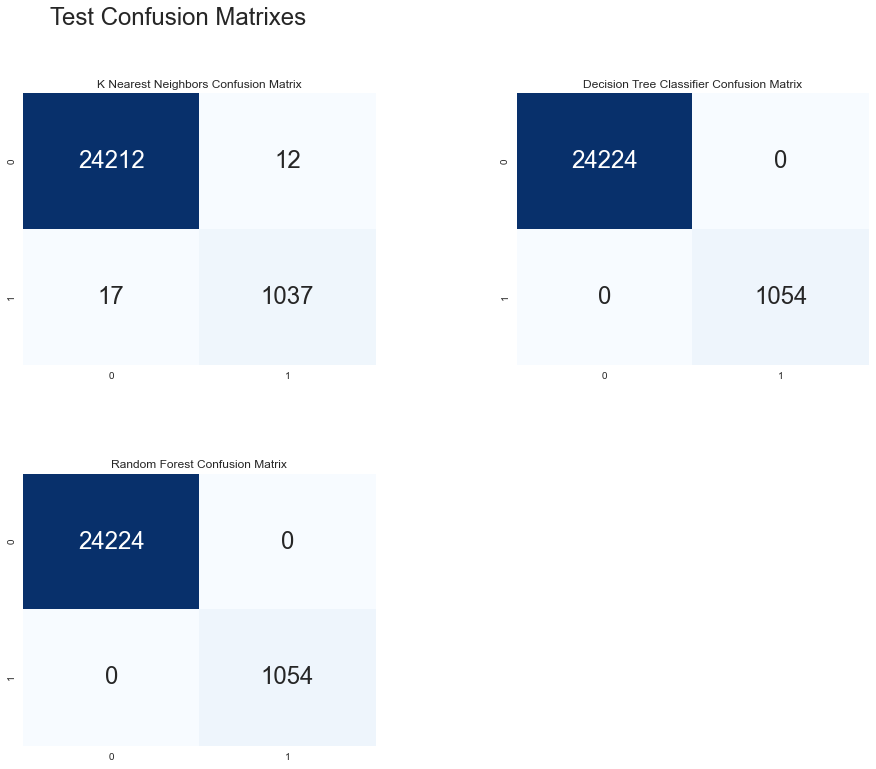

In [532]:

plt.figure(figsize=(24,12))

plt.suptitle("Test Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

#Confusion Matrix for train

In [533]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_train.T)
y_head_dtc = dtc.predict(x_train.T)
y_head_rf = rf.predict(x_train.T)

In [534]:

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_train,y_head_knn)
cm_dtc = confusion_matrix(y_train,y_head_dtc)
cm_rf = confusion_matrix(y_train,y_head_rf)

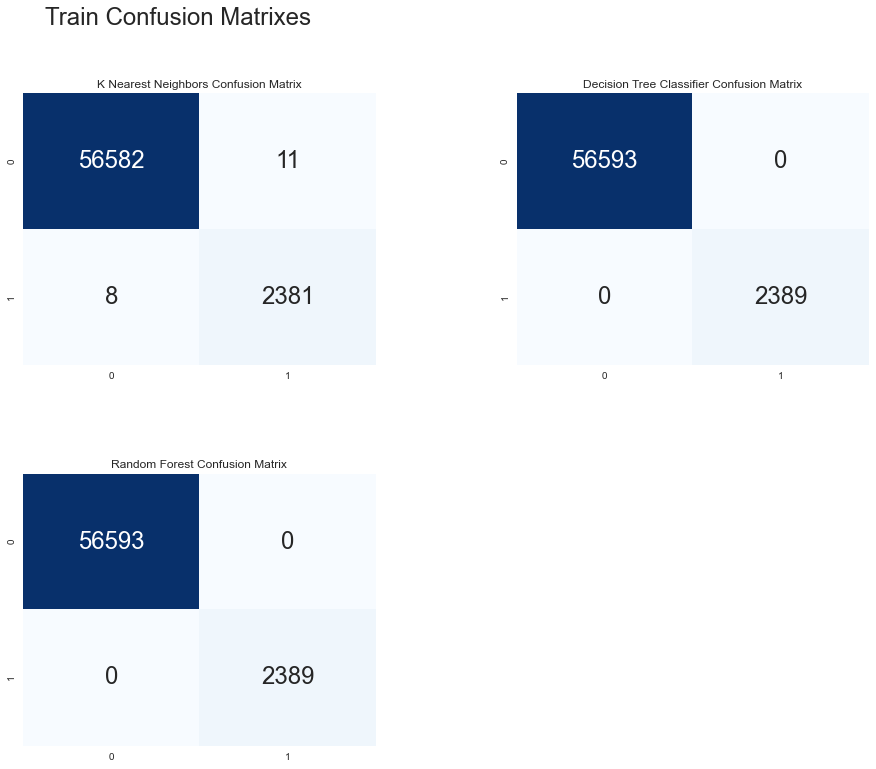

In [535]:

plt.figure(figsize=(24,12))

plt.suptitle("Train Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()